In [ ]:
import pandas as pd 

train_path = "/content/drive/MyDrive/datasets/tamil-emotion/train_emo_taxonomy.csv"
val_path = "/content/drive/MyDrive/datasets/tamil-emotion/dev_emo_taxonomy.csv"
test_path = "/content/drive/MyDrive/datasets/tamil-emotion/test_emo_taxonomy.csv"

In [ ]:
train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [ ]:
train_df

,Unnamed: 0,text,category,english,group,sentiment,group_enc,sentiment_enc
0,2293,நம் பாட்டன் முப்பாட்டன் வணிகம் மூலம் உலகறிய செ...,ஆர்வம்,curiosity,அன்பு,positive,2,0
1,53,பார்க்க பார்க்க துண்டும் படம் இது,ஆர்வம்,curiosity,அன்பு,positive,2,0
2,4249,தமிழர்களின் நாகரீகத்தை அழித்தவர்கள் திராவிட பி...,கோபம்,anger,inivarai,negative,4,1
3,8907,தமிழர்களின் குறிப்பாக சோழர் களின் அரசுரிமையில்...,உண்மையை உணர்தல்,realization,நடுநிலை,ambigous,1,2
4,2351,சீமான் முகத்தில் காிபுசிய ஸ்டாலின் ஐயா 😀😀,ஒப்புதல்,approval,நடுநிலை,ambigous,1,2
...,...,...,...,...,...,...,...,...
34143,718,பெருமை இழப்பார் சுயமா,மறுப்பு,disapproval,inivarai,negative,4,1
34144,768,இன்னும் ஒரு மாதம் சீனா வ பத்தி பேசியே கொல்லுவன...,உண்மையை உணர்தல்,realization,நடுநிலை,ambigous,1,2
34145,27149,திருவண்ணாமலை வன்னியர்கள் சார்பாக வாழ்துகளை தெர...,எரிச்சல்,annoyance,inivarai,negative,4,1
34146,22886,வந்துட்டியா ராஜா அமெரிக்கா சீனா பீதியை கிளப்பு...,கிண்டல்,teasing,nagai,negative,6,1


## Logistice Regression Binary Classifier model

In [ ]:
def logistic_regression(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer(ngram_range=(1,2))
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  lr_model = LogisticRegression()
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

In [ ]:
y_test, lr_pred, lr_pred_pob = logistic_regression(train_df,val_df,test_df)

## Logistic Regression as a Multi Class

In [ ]:
def logistic_regression_multiclass(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  
  reg = 0.1

  #fitting the training dataset to the multiclass classification Logistic Regression model
  lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000)
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

In [ ]:
y_test, lr_pred, lr_pred_pob = logistic_regression_multiclass(train_df,val_df,test_df)

## Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
def linear_svm(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = LinearSVC(random_state=42, max_iter=2000)
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  #lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  #lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  #lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict

In [ ]:
y_test, lr_pred =  linear_svm(train_df,val_df,test_df)

## MultiNomail Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
def multinomail_nb(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = MultinomialNB()
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_pob

In [ ]:
y_test, nb_pred, nb_pred_proba =  multinomail_nb(train_df,val_df,test_df)

## Decision Tree

In [ ]:
  from sklearn.tree import DecisionTreeClassifier

In [ ]:
def decision_tree(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = DecisionTreeClassifier(max_depth=50)
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_pob

In [ ]:
y_test, dt_pred, dt_pred_proba =  decision_tree(train_df,val_df,test_df)

Train Accuracy:  0.5347311702003046


*********** CLASSIFICATION REPORT FOR TRAIN SETS**************
                                     precision    recall  f1-score   support

                             அக்கறை       0.94      0.46      0.62       594
                              அன்பு       0.93      0.47      0.63       532
                         அருவருப்பு       0.94      0.37      0.53       388
                                ஆசை       0.96      0.41      0.57       179
                          ஆச்சரியம்       0.94      0.35      0.52       234
                             ஆர்வம்       0.92      0.40      0.56       902
                    உண்மையை உணர்தல்       0.39      0.69      0.49      3997
                           உற்சாகம்       0.93      0.37      0.53       582
    எதிர்காலத்தைப் பற்றிய நம்பிக்கை       0.97      0.40      0.56       327
                      எதிர்பார்ப்பு       0.93      0.45      0.60      2419
                           எரிச்சல்       0.97     

## Random Forest

In [ ]:
 from sklearn.ensemble import RandomForestClassifier

In [ ]:
def random_forest(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = RandomForestClassifier()
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict

In [ ]:
y_test, rf_pred = random_forest(train_df,val_df,test_df)

Train Accuracy:  0.9573035024013119


*********** CLASSIFICATION REPORT FOR TRAIN SETS**************
                                     precision    recall  f1-score   support

                             அக்கறை       0.99      0.95      0.97       594
                              அன்பு       0.92      0.92      0.92       532
                         அருவருப்பு       0.99      0.95      0.97       388
                                ஆசை       0.98      0.94      0.96       179
                          ஆச்சரியம்       0.98      0.93      0.95       234
                             ஆர்வம்       0.99      0.96      0.98       902
                    உண்மையை உணர்தல்       0.99      0.98      0.99      3997
                           உற்சாகம்       0.97      0.90      0.93       582
    எதிர்காலத்தைப் பற்றிய நம்பிக்கை       0.98      0.95      0.97       327
                      எதிர்பார்ப்பு       0.98      0.97      0.97      2419
                           எரிச்சல்       0.98     

In [ ]:
#from pretty_confusion_matrix import pp_matrix_from
import numpy as np
cm = confusion_matrix(y_test,rf_pred,labels=np.unique(y_test))
df_cm = pd.DataFrame(cm)
df_cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,13,1,1,0,0,1,11,0,0,1,2,0,2,4,0,0,0,2,0,0,0,0,1,0,0,0,0,0,23,0,0
1,0,8,0,0,0,0,1,0,0,2,1,0,1,6,0,0,0,0,0,0,0,0,3,1,1,0,0,1,24,2,0
2,0,0,7,0,0,0,4,0,0,1,3,0,1,9,0,0,0,3,0,0,0,0,0,1,0,0,0,2,14,0,0
3,0,0,0,5,0,0,1,0,0,2,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,8,2,0
4,0,1,0,0,5,0,1,0,0,0,1,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,0,2,9,0,0
5,0,2,0,0,0,20,7,0,3,7,4,1,1,16,0,1,1,4,0,0,0,0,0,1,0,0,0,0,35,2,1
6,1,2,0,1,0,1,190,1,1,21,8,0,13,45,2,0,0,8,1,2,0,0,7,8,1,0,0,6,128,13,3
7,0,2,0,0,1,0,10,11,0,1,1,1,1,7,0,1,0,0,0,0,1,0,2,2,0,0,0,7,27,4,0
8,0,1,0,0,0,0,4,2,7,4,1,0,0,5,0,0,0,3,0,0,0,0,0,1,2,0,0,2,18,0,1
9,1,3,0,0,0,4,32,0,0,95,2,0,8,28,0,2,1,13,2,2,1,2,9,6,3,0,0,9,93,3,1


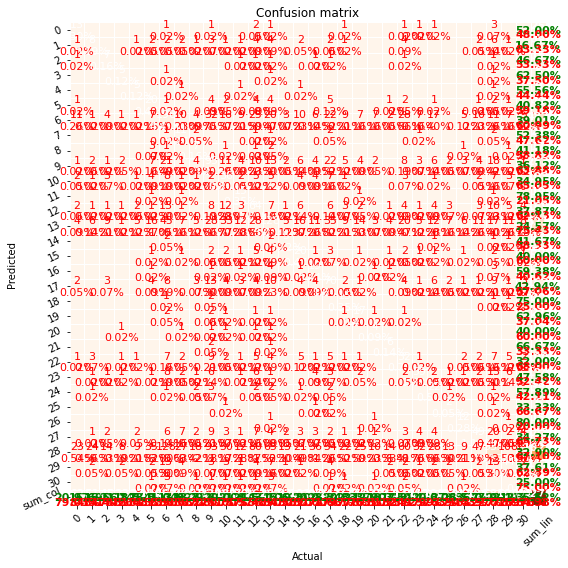

In [ ]:
from pretty_confusion_matrix import pp_matrix

pp_matrix(df_cm)

In [ ]:
df_cm.to_csv("/content/drive/MyDrive/datasets/tamil-emotion/plotsconfusion_matrix_of_rf.csv")

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def k_neighbors(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = KNeighborsClassifier(algorithm='brute')
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_pob

In [ ]:
y_test, k_pred, k_pred_proba = k_neighbors(train_df,val_df,test_df)

Train Accuracy:  0.4918882511420874


*********** CLASSIFICATION REPORT FOR TRAIN SETS**************
                                     precision    recall  f1-score   support

                             அக்கறை       0.34      0.65      0.45       594
                              அன்பு       0.28      0.60      0.38       532
                         அருவருப்பு       0.24      0.61      0.34       388
                                ஆசை       0.23      0.58      0.33       179
                          ஆச்சரியம்       0.27      0.56      0.36       234
                             ஆர்வம்       0.41      0.55      0.47       902
                    உண்மையை உணர்தல்       0.54      0.60      0.57      3997
                           உற்சாகம்       0.25      0.39      0.30       582
    எதிர்காலத்தைப் பற்றிய நம்பிக்கை       0.45      0.42      0.43       327
                      எதிர்பார்ப்பு       0.51      0.53      0.52      2419
                           எரிச்சல்       0.44     

## ExtraTrees

In [ ]:
from sklearn.tree import ExtraTreeClassifier

In [ ]:
def extra_trees(train_df,val_df,test_df):
  

  x_train, x_val, x_test = train_df['text'].values, val_df['text'].values, test_df['text'].values

  y_train, y_val, y_test = train_df['category'].values, val_df['category'].values, test_df['category'].values

  
  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  
  x_val = cv.transform(x_val)
  x_test = cv.transform(x_test)

  

  #fitting the training dataset to the model
  lr_model = ExtraTreeClassifier()
  lr_model.fit(x_train,y_train)
  lr_predict_train = lr_model.predict(x_train)
  lr_predict_proba_train = lr_model.predict(x_train)
  lr_predict_val = lr_model.predict(x_val)
  lr_pred_prob_val = lr_model.predict_proba(x_val)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)


  print("Train Accuracy: ",accuracy_score(y_train, lr_predict_train))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TRAIN SETS**************")
  #print(confusion_matrix(y_train,lr_predict_train))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TRAIN SETS**************")
  print(classification_report(y_train,lr_predict_train))


  
  print("Validation Accuracy: ",accuracy_score(y_val, lr_predict_val))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR VAL SETS**************")
  #print(confusion_matrix(y_val,lr_predict_val))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR VAL SETS**************")
  print(classification_report(y_val,lr_predict_val))

  #evaluation metrics for the dataset
  print("Test Accuracy: ",accuracy_score(y_test, lr_predict))

  #print("\n")
  #print("*********** CONFUSION MATRIX FOR TEST SETS **************")
  #print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT FOR TEST SETS**************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_pob

In [ ]:
y_test, extra_preds, extra_probs = extra_trees(train_df,val_df,test_df)

Train Accuracy:  0.9573035024013119


*********** CLASSIFICATION REPORT FOR TRAIN SETS**************
                                     precision    recall  f1-score   support

                             அக்கறை       0.96      0.96      0.96       594
                              அன்பு       0.91      0.94      0.92       532
                         அருவருப்பு       0.96      0.96      0.96       388
                                ஆசை       0.97      0.95      0.96       179
                          ஆச்சரியம்       0.97      0.94      0.95       234
                             ஆர்வம்       0.96      0.97      0.97       902
                    உண்மையை உணர்தல்       0.98      0.99      0.99      3997
                           உற்சாகம்       0.94      0.91      0.93       582
    எதிர்காலத்தைப் பற்றிய நம்பிக்கை       0.97      0.96      0.97       327
                      எதிர்பார்ப்பு       0.97      0.97      0.97      2419
                           எரிச்சல்       0.97     